<a href="https://colab.research.google.com/github/andylnkd/test/blob/master/COVID19_confirmed_cases_align.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

--2020-04-02 22:19:01--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54836 (54K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv’

time_series_covid19 100%[===================>]  53.55K  --.-KB/s    in 0.05s   

2020-04-02 22:19:01 (1008 KB/s) - ‘time_series_covid19_confirmed_global.csv’ saved [54836/54836]



In [8]:
ts = pd.read_csv('time_series_covid19_confirmed_global.csv')

ts['']
# ts.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,5,5,6
252,NaN,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,9
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,4
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2


In [6]:
# Get data
countries = ["Italy", "Switzerland", "Czechia", "Spain", "Germany",  "US", "Austria", "Slovakia", "Ukraine"] 
cases_per_country = dict()
for c in countries:
  res = ts[ts['Country/Region'] == c]
  cases_per_country[c] = res[res.columns[4:]].values.reshape(-1)
  print (c, cases_per_country[c])

Italy [     0      0      0      0      0      0      0      0      0      2
      2      2      2      2      2      2      3      3      3      3
      3      3      3      3      3      3      3      3      3      3
     20     62    155    229    322    453    655    888   1128   1694
   2036   2502   3089   3858   4636   5883   7375   9172  10149  12462
  12462  17660  21157  24747  27980  31506  35713  41035  47021  53578
  59138  63927  69176  74386  80589  86498  92472  97689 101739 105792
 110574]
Switzerland [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     1     1
     8     8    18    27    42    56    90   114   214   268   337   374
   491   652   652  1139  1359  2200  2200  2700  3028  4075  5294  6575
  7474  8795  9877 10897 11811 12928 14076 14829 15922 16605 17768]
Czechia [   0    0    0    0    0    0    0

In [7]:
align_by_cases=80

cases_per_country_aligned = {}
for k,v in cases_per_country.items():
  cases_per_country_aligned[k] = v[v>=align_by_cases]
#Temporary data update from https://www.seznamzpravy.cz/clanek/koronavirus-v-cislech-jak-nakaza-postupuje-ceskem-92585?fbclid=IwAR3HrPZ0enRXXGAEdpaYJvc9bac5ogmzgAHsqi633drkml0jCDtygYqm40w
cases_per_country_aligned['Czechia']
#cases_per_country_aligned['Czechia'][-2] = 2022
#cases_per_country_aligned['Czechia'][-1] = 2395

#cases_per_country_aligned['Czechia'] = np.concatenate([cases_per_country_aligned['Czechia'], np.array([2279])], axis=0)
cases_per_country_aligned['Czechia']

array([  91,   94,  141,  189,  253,  298,  396,  464,  694,  833,  995,
       1120, 1236, 1394, 1654, 1925, 2279, 2631, 2817, 3001, 3308, 3508])

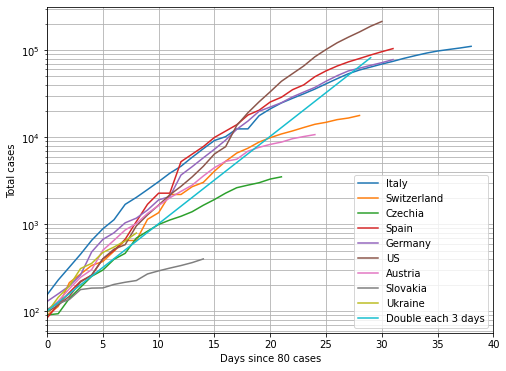

In [8]:
plt.figure(figsize=(8,6))
leg = []
for k,v in cases_per_country_aligned.items():
  plt.semilogy(v.reshape(-1))
  leg.append(k)
plt.semilogy(np.arange(30), align_by_cases*np.power(np.power(2,1./3.), np.arange(1, 31)))
leg.append('Double each 3 days')
plt.ylabel('Total cases')
plt.xlabel(f'Days since {align_by_cases} cases')
plt.grid('on')
plt.grid(True, which="both")
plt.xlim([0,40])
plt.legend(leg)

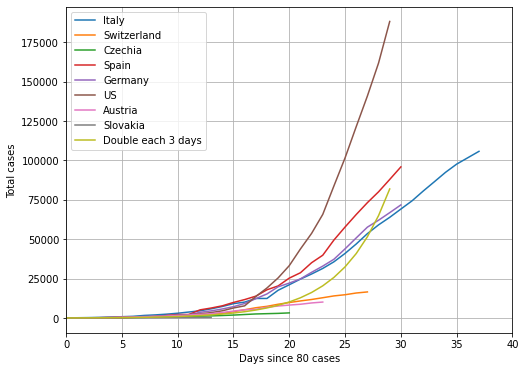

In [0]:
plt.figure(figsize=(8,6))
leg = []
for k,v in cases_per_country_aligned.items():
  plt.plot(v.reshape(-1))
  leg.append(k)
plt.plot(np.arange(30), align_by_cases*np.power(np.power(2,1./3.), np.arange(1, 31)))
leg.append('Double each 3 days')
plt.ylabel('Total cases')
plt.xlabel(f'Days since {align_by_cases} cases')
plt.grid('on')
plt.grid(True, which="both")
plt.xlim([0,40])
plt.legend(leg)

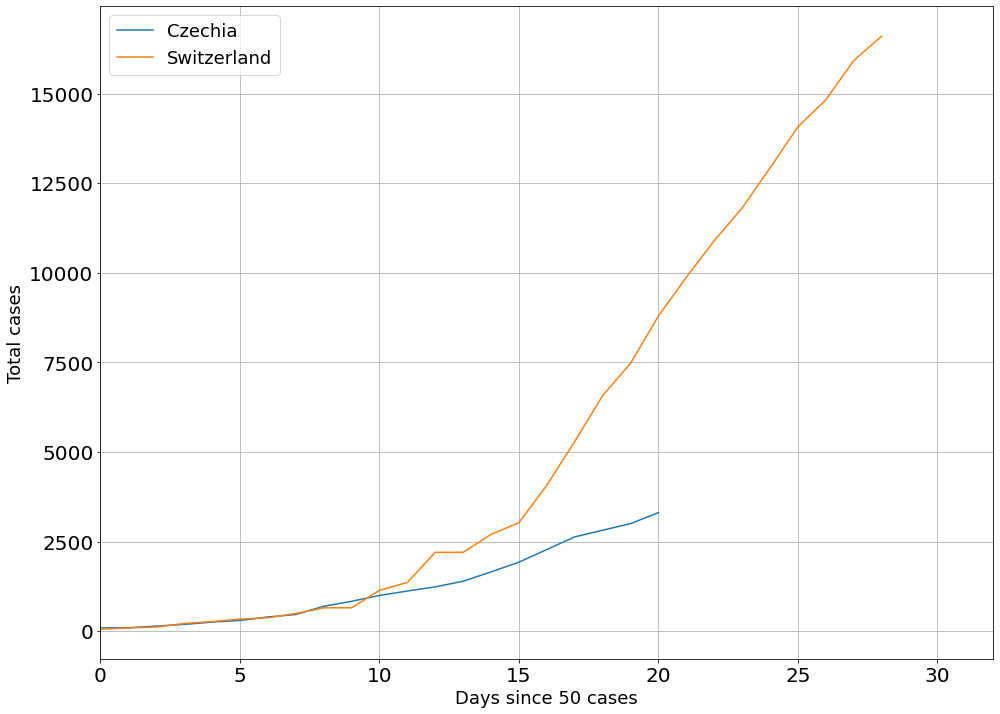

In [0]:
align_by_cases=50

cases_per_country_aligned = {}
for k,v in cases_per_country.items():
  cases_per_country_aligned[k] = v[v>=align_by_cases]


plt.figure(figsize=(16,12))
leg = []
countries_to_plot = ['Czechia', "Switzerland"]
for k in countries_to_plot:
  v = cases_per_country_aligned[k]
  plt.plot(v.reshape(-1))
  leg.append(k)
#plt.axis_params(labelsize=20)

#plt.plot(np.arange(30), align_by_cases*np.power(np.power(2,1./3.), np.arange(1, 31)))
#leg.append('Double each 3 days')
plt.ylabel('Total cases', fontsize=18)
plt.xlabel(f'Days since {align_by_cases} cases', fontsize=18)
plt.grid('on')
plt.grid(True, which="both")
plt.xlim([0,32])
plt.tick_params(labelsize=20)
plt.legend(leg, fontsize=18)